In [1]:
import sys
sys.path.append('../approximations')
import numpy as np
import matplotlib.pyplot as plt
from pa_approx import PAA
from kernel_sax import KernelSAX

In [2]:
X = np.random.randn(100)

In [8]:
kernel_sax = KernelSAX(X, alphabets=np.arange(5), kernel="epanechnikov", epochs=50, verbose=True)

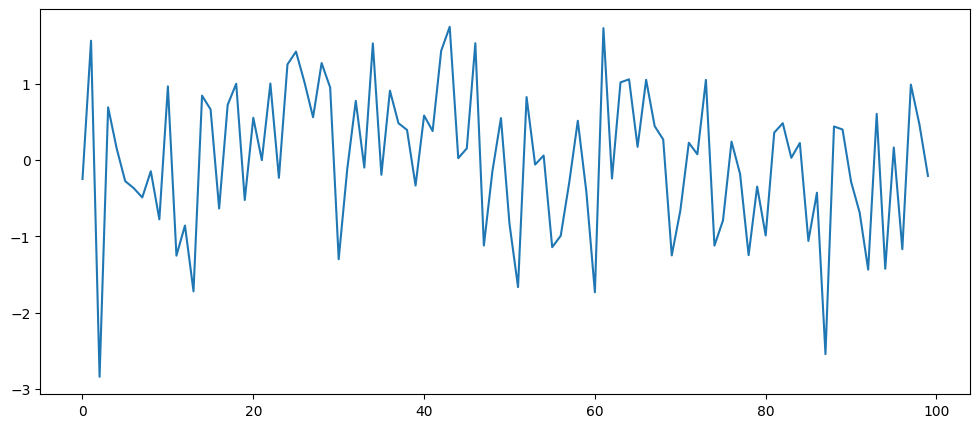

In [9]:
plt.figure(figsize=(12,5))
plt.plot(X)

In [13]:
def plot_sax_encoding(x, sax, outpath='saxplot.png'):
    bin_eps = 0.5
    label_eps = 0.5
    
    sax.find_cut_points(paa_window_size=2)
    x_encoded = sax.encode(x).squeeze()

    boundaries = np.array(sax.boundaries[1:][:-1])
    r = np.maximum(abs(np.max(x)), abs(np.min(x))) + bin_eps
    y_min = -r
    y_max = r

    fig, ax = plt.subplots(figsize=(7.4, 4.0))
    ax.plot(x, color='C0')
    ax.scatter(np.arange(len(x)), x, marker='x', color='C0')
    for b in boundaries:
        plt.axhline(b, color='C1', linestyle='--', alpha=0.7)
    
    # Set encoding text
    _boundaries = np.array([y_min, *boundaries, y_max])
    y_pos = (_boundaries[1:] + _boundaries[:-1]) / 2
    x_max = len(x) - 1 + label_eps
    
    alphabet = [chr(65 + i) for i in range(len(sax.alphabets))]
    tokenized = [chr(65 + i) for i in range(len(sax.alphabets))]
    for character, _y in zip(alphabet, y_pos):
        plt.text(x=x_max, y=_y, s=character, fontweight='bold')

    x_encoded = ''.join([alphabet[i-1] for i in x_encoded])

    plt.title(r'$x_{enc}=$' + x_encoded)
    plt.ylim(y_min, y_max)
    plt.xticks(ticks=np.arange(len(x)), labels=np.arange(len(x)))
    plt.xlabel(r'$t$')
    #plt.yticks([])

    padding = 0.1
    gauss_width = 0.1 + padding
    plt.subplots_adjust(left=gauss_width)
    old_position = ax.get_position().bounds
    # [left, bottom, width, height]
    new_position = (padding, old_position[1], gauss_width-padding, old_position[3])
    cax = plt.axes(new_position, sharey=ax)

    support = np.linspace(-3, 3, 1000)
    height = -0.3
    sd = 1
    gaussian = np.exp((-support ** 2.0) / (2 * sd ** 2.0))
    gaussian /= gaussian.max()
    gaussian *= height

    #cax.plot([1, 2, 3])
    cax.plot(gaussian, support)
    cax.set_xticks([])

In [14]:
import warnings
warnings.filterwarnings("ignore")

Epoch: 0 Boundaries Delta: 0.47452291465188395 Codewords Delta: 0.23646662538032906
Epoch: 1 Boundaries Delta: 0.12653036086736338 Codewords Delta: 0.10385809083927447
Epoch: 2 Boundaries Delta: 0.09465771121027122 Codewords Delta: 0.07834266737399377
Epoch: 3 Boundaries Delta: 0.07173749813679701 Codewords Delta: 0.05460065181087935
Epoch: 4 Boundaries Delta: 0.0475637852978603 Codewords Delta: 0.03694754379975482
Epoch: 5 Boundaries Delta: 0.031907100949070344 Codewords Delta: 0.024569440592731803
Epoch: 6 Boundaries Delta: 0.022629108460165148 Codewords Delta: 0.017835727472728415
Epoch: 7 Boundaries Delta: 0.017234623210496333 Codewords Delta: 0.014899557754361853
Epoch: 8 Boundaries Delta: 0.015800021651676936 Codewords Delta: 0.014561194870824612
Epoch: 9 Boundaries Delta: 0.01575920629680852 Codewords Delta: 0.014509737395270539
Epoch: 10 Boundaries Delta: 0.01605174585383603 Codewords Delta: 0.01487353680631744
Epoch: 11 Boundaries Delta: 0.01666105404871333 Codewords Delta: 0.

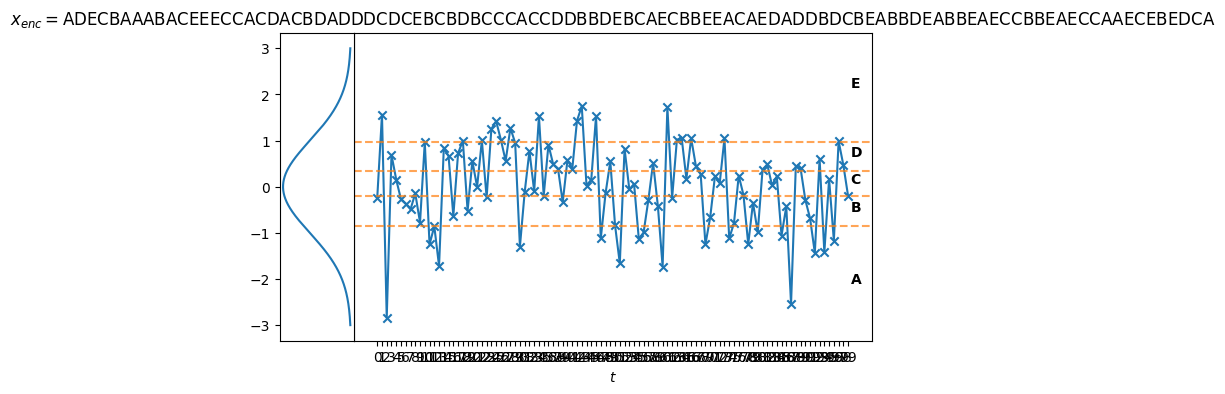

In [15]:
plot_sax_encoding(X, kernel_sax)